## Building a Simple Linear Regression model to Predict Salary based on experience


### Importing Essential Libraries 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Data

In [55]:
sal_data=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\04. Simple Linear Regression\Salary_Data.csv")

In [56]:
sal_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

## Checkout the Data & Missing Values

In [57]:
#Check for Null Values
sal_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [58]:
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [59]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [60]:
sal_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Exploratory Data Analysis
**Let's explore the data**



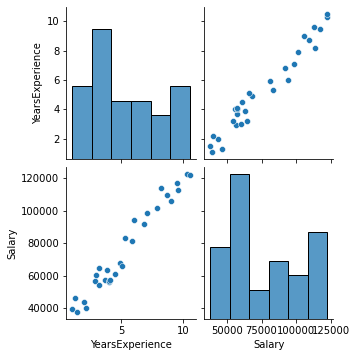

In [61]:
#Plotting Data on PairPlot to Check Linearity 
sns.pairplot(sal_data)

C:\Users\aravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

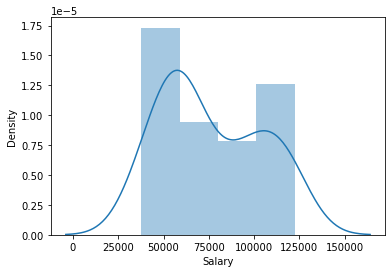

In [62]:
#Plotting Distribution plot of Salary Column
sns.distplot(sal_data['Salary'])

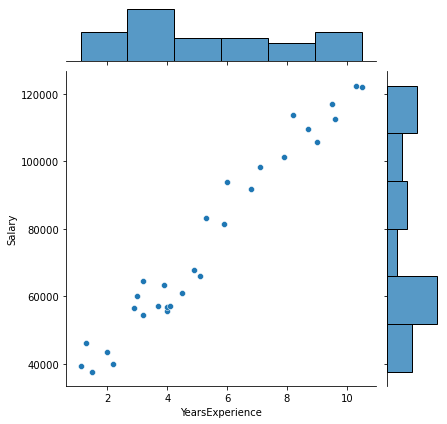

In [63]:
sns.jointplot(x='YearsExperience',y='Salary',data=sal_data)


**Creating linear model plot (using seaborn's lmplot) of  Years of Experience vs. Salary.**

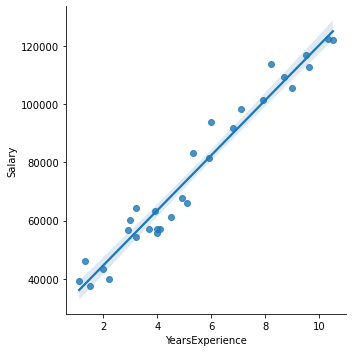

In [64]:
sns.lmplot(x='YearsExperience', y='Salary', data=sal_data)

In [65]:
sal_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Q-Q (Quatile-Quantile) plot Representaion to check the normality of the data

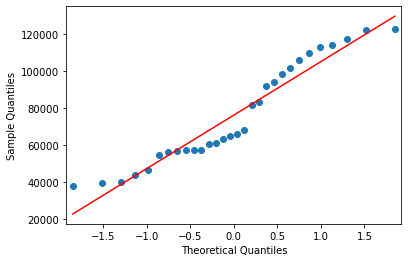

 We can observe that the data points are around the regression line, line touching few of the points


In [66]:
## Q-Q plot
import statsmodels.api as sm
import pylab as py

sm.qqplot(sal_data['Salary'], line='r')
py.show()

print(" We can observe that the data points are around the regression line, line touching few of the points")

### Logarithmic Transformation 

In [204]:
import numpy as np
sal_data['Salary_log']=np.log(sal_data['Salary'])
sal_data['Salary_log'].head()

0    10.580073
1    10.740843
2    10.538237
3    10.681091
4    10.593906
Name: Salary_log, dtype: float64


  Q-Q Plot of Logarithmic Transformation data of Salary 


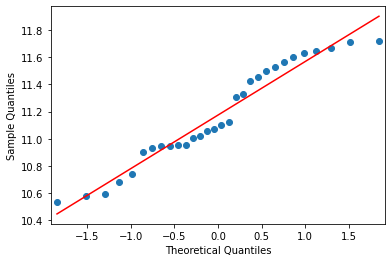

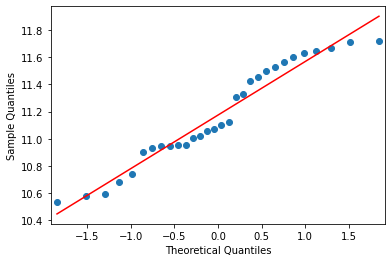

In [68]:
## plotting Q-Q plot after logarithmic transformation of data
import statsmodels.api as qp
print('\n','\033[1m',"Q-Q Plot of Logarithmic Transformation data of Salary",'\033[0m')
qp.qqplot(sal_data['Salary_log'], line='r')

## Square Root Transformation

In [69]:
##Square Root Transformation
sal_data['Salary_Square']=sal_data.Salary**(1/2)
sal_data['Salary_Square']

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: Salary_Square, dtype: float64

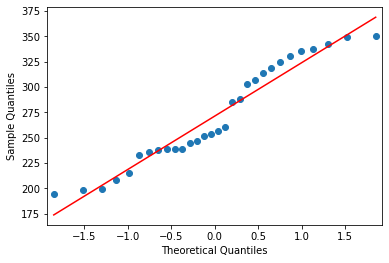

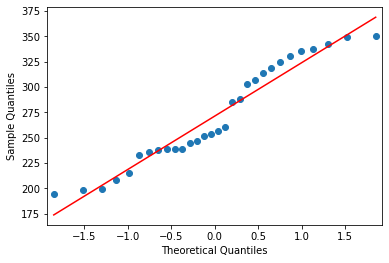

In [70]:
sm.qqplot(sal_data['Salary_Square'], line='r')

**From above three Q-Q plots we can observe that the three plots looks similar to each other hence here we cannot take a single data to build the model.**

**I will build model using the given data set & using log transformation data & Square Root transformation data to get the best optimal model to predict the salary with more accuracy**

## Splitting data for Model Training and Testing
**Split Data for X and y variables**

In [71]:
X=sal_data.iloc[: ,0:1]
y=sal_data.iloc[:, 1:2]
print(X.head())
print(y.head())

   YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2
    Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)
print(X_train.info())
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 6
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  21 non-null     float64
dtypes: float64(1)
memory usage: 336.0 bytes


## Fitting a Linear Regression Model to Predict Salary Hike without any Transformation

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
model = LinearRegression()

In [75]:
model.fit(X_train,y_train)

LinearRegression()

In [76]:
model.intercept_

array([25151.81846773])

In [77]:
model.coef_

array([[9634.58193471]])

# Model Predictions

In [78]:
predictions=model.predict(X_test)

Text(0, 0.5, 'y predicted')

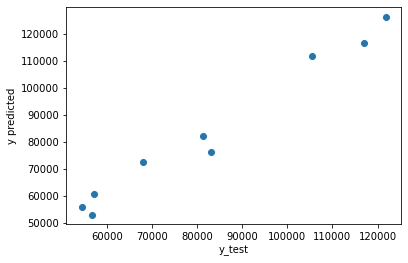

In [79]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('y predicted')

C:\Users\aravi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

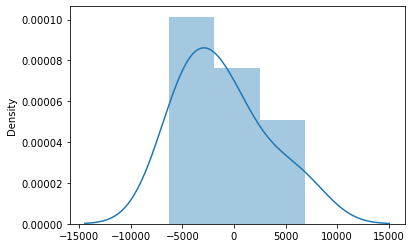

In [80]:
# Residual Histogram
sns.distplot((y_test-predictions))

## Regression Evaluation Metrics

**Here are the three evaluation metrics for regression problems**

**Mean Absolute Error (MAE)**

**Mean Squared Error(MSE)** 

**Root Mean Squared Error(RMSE)**

**RSquare Value(Coefficient of Determination)**

In [81]:
from sklearn import metrics

In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3515.533681124852
MSE: 17164488.96420073
RMSE: 4143.004823096484


In [183]:
#Rsquare Value
Rsquare_value=model.score(X_train, y_train)
Rsquare_value

0.955850114915764

### Logarithmic Transformation

In [129]:
#Log Transformation

Xlog=np.log(sal_data['Salary']).values.reshape(-1,1)
ylog=np.log(sal_data['YearsExperience']).values.reshape(-1,1)

print(Xlog)
print(ylog)

[[10.58007335]
 [10.7408433 ]
 [10.53823732]
 [10.68109076]
 [10.59390601]
 [10.94450604]
 [11.00459672]
 [10.9049463 ]
 [11.07356743]
 [10.95411685]
 [11.05434435]
 [10.92942162]
 [10.95005188]
 [10.95222659]
 [11.02044716]
 [11.1263508 ]
 [11.09784932]
 [11.32765557]
 [11.3066759 ]
 [11.45041156]
 [11.42669197]
 [11.4955046 ]
 [11.52586143]
 [11.64230324]
 [11.60304949]
 [11.56724318]
 [11.66966422]
 [11.63190778]
 [11.71497612]
 [11.71072659]]
[[0.09531018]
 [0.26236426]
 [0.40546511]
 [0.69314718]
 [0.78845736]
 [1.06471074]
 [1.09861229]
 [1.16315081]
 [1.16315081]
 [1.30833282]
 [1.36097655]
 [1.38629436]
 [1.38629436]
 [1.41098697]
 [1.5040774 ]
 [1.58923521]
 [1.62924054]
 [1.66770682]
 [1.77495235]
 [1.79175947]
 [1.91692261]
 [1.96009478]
 [2.06686276]
 [2.10413415]
 [2.16332303]
 [2.19722458]
 [2.2512918 ]
 [2.2617631 ]
 [2.3321439 ]
 [2.35137526]]


## Splitting Log Transformation Data

In [130]:
from sklearn.model_selection import train_test_split
Xlog_train, Xlog_test, ylog_train, ylog_test=train_test_split(Xlog,ylog, test_size=0.3, random_state=42)

In [131]:
logmodel=LinearRegression()

In [132]:
logmodel.fit(Xlog_train,ylog_train)

LinearRegression()

In [185]:
#Log Data Predictions
Ylog_test_predict=logmodel.predict(Xlog_test)
Ylog_test_predict

array([[2.27374849],
       [1.42579206],
       [2.2911845 ],
       [1.76343484],
       [1.33725999],
       [1.13690892],
       [2.41307666],
       [2.22534529],
       [1.13009085]])

In [184]:
# Calculating Residual values
Residual=Ylog_test_predict-ylog_test
Residual

array([[ 0.01198539],
       [-0.16344315],
       [ 0.18705035],
       [ 0.09572802],
       [ 0.17410918],
       [-0.1714239 ],
       [ 0.08093276],
       [ 0.06202227],
       [-0.25620351]])

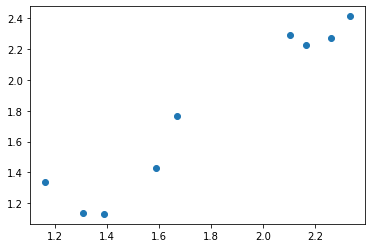

In [135]:
plt.scatter(ylog_test,Ylog_test_predict)

In [136]:
print('MAE:', metrics.mean_absolute_error(ylog_test,Ylog_test_predict))
print('MSE:', metrics.mean_squared_error(ylog_test,Ylog_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ylog_test,Ylog_test_predict)))

MAE: 0.13365539275961147
MSE: 0.022971808272358434
RMSE: 0.1515645350085515


In [203]:
Rsquare_logmodel=logmodel.score(Xlog_train,ylog_train)
print("Rsquare value or the accuracy of the Log Transformation model is:",int(Rsquare_logmodel*100),'%')

Rsquare value or the accuracy of the Log Transformation model is: 89 %


### Building a model with Square Root Transformation Data

In [172]:
##Square Root Transformation
import numpy as np
X_sqrt=np.sqrt(sal_data['Salary']).values.reshape((-1,1))

y_sqrt=np.sqrt(sal_data['YearsExperience']).values.reshape((-1,1))

## splitting Data
X_sqrt_train, X_sqrt_test, y_sqrt_train, y_sqrt_test = train_test_split(X_sqrt,y_sqrt, test_size=0.30)


In [173]:
SqrtModel=LinearRegression()

In [174]:
SqrtModel.fit(X_sqrt_train,y_sqrt_train)

LinearRegression()

In [193]:
Rsquare_sqrtmodel=SqrtModel.score(X_sqrt_train, y_sqrt_train)
Rsquare_sqrtmodel

0.9343268913050558

In [176]:
y_predictions=SqrtModel.predict(X_sqrt_test)
y_predictions

array([[2.7697791 ],
       [1.99333788],
       [1.82521894],
       [2.6371164 ],
       [2.02372191],
       [2.41638609],
       [3.22472039],
       [3.21542929],
       [2.68233042]])

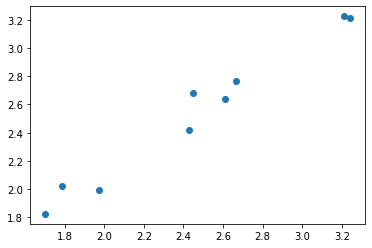

In [177]:
#Residual
plt.scatter(y_sqrt_test,y_predictions)

In [179]:
print('MAE:', metrics.mean_absolute_error(X_sqrt_test,y_predictions))
print('MSE:', metrics.mean_squared_error(X_sqrt_test,y_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_sqrt_test,y_predictions)))

MAE: 291.9502449860993
MSE: 86687.22450389882
RMSE: 294.4269425577402


## Choosing the best Regression model with Low Error & best Rsquare Value 

**Comparing all three models Rsquare value or the Accuracy**

In [218]:
print('Rsquare Value of the data without Data Transformation is: ', Rsquare_value,'\n','\n','MAE: 3515.533681124852','\n'
,'MSE: 17164488.96420073','\n',
'RMSE: 4143.004823096484','\n')
print('Rsquare Value of the data with log Transformation is: ',Rsquare_logmodel,'\n''\n','MAE: 0.13365539275961147','\n'
'MSE: 0.022971808272358434','\n'
'RMSE: 0.1515645350085515','\n')
print('Rsquare Value of the data without Square Root Transformation is: ', Rsquare_sqrtmodel,'\n''\n', 'MAE: 291.9502449860993','\n',
'MSE: 86687.22450389882','\n',
'RMSE: 294.4269425577402' )

Rsquare Value of the data without Data Transformation is:  0.955850114915764 
 
 MAE: 3515.533681124852 
 MSE: 17164488.96420073 
 RMSE: 4143.004823096484 

Rsquare Value of the data with log Transformation is:  0.8993900428504725 

 MAE: 0.13365539275961147 
MSE: 0.022971808272358434 
RMSE: 0.1515645350085515 

Rsquare Value of the data without Square Root Transformation is:  0.9343268913050558 

 MAE: 291.9502449860993 
 MSE: 86687.22450389882 
 RMSE: 294.4269425577402


## Conclusion:
 **Among the all three models the error value is very minimal for Logarithmic Transformation model so for the given data set I will recommend Logarithmic transformation Prediction model to predict the Salary.**
 
**MAE: 0.13365539275961147**

**MSE: 0.022971808272358434**

**RMSE: 0.1515645350085515**

**Rsquare value or the accuracy of the Log Transformation model is: 89 %**